# Programming and Mathematics for AI - coursework

## TASK 1
The task is about classification on the MNIST dataset. 
You can use other API’s/libraries for loading the dataset, but not for the neural network 
implementation. The point of this task is to develop a multi-layer neural network for 
classification using numpy. The task requires following sub-tasks

#### Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

### a - Implement sigmoid and ReLU layers
For this sub-task, you should implement forward and backward pass for 
sigmoid and ReLU. You should consider presenting these activation
functions in the report with any pros cons if they have.

In [2]:
def reLu(x):
    '''
    Implementation of reLu function.
    '''
    return np.maximum(0, x)

In [3]:
def sigmoid(x):
    '''
    Implementation of Sigmoid function.
    '''
    return 1 / (1 + np.exp(-x))

In [4]:
def softmax(x):
    '''
    Implementation of Softmax function
    '''
    normalization = np.sum(np.exp(x))
    return [np.exp(el)/normalization for el in x]

Text(0.5, 1.0, 'ReLU activation function')

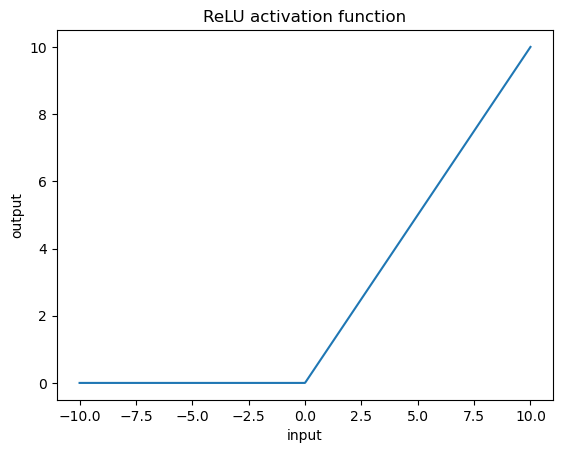

In [5]:
x = np.linspace(-10,10,1000)
plt.plot(x, reLu(x))
plt.xlabel("input")
plt.ylabel("output")
plt.title("ReLU activation function")

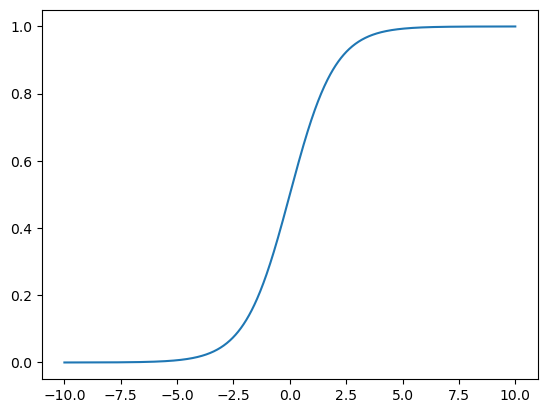

In [6]:
x = np.linspace(-10,10,1000)
plt.plot(x, sigmoid(x))

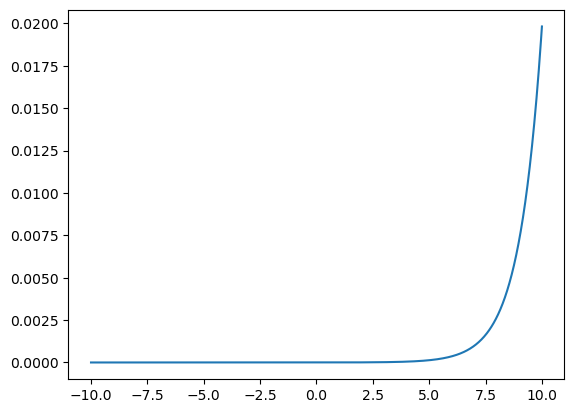

In [7]:
plt.plot(x, softmax(x))
# How do I test my implementation of the softmax function?

In [10]:
class ReLu:
    '''
    A class representing the Rectified Linear Unit (reLu) activation function.
    '''
    def __init__(self):
        self.input = None # placeholder for storing the input to the layer
    
    def forward_pass(self, x):
        self.input = x # store the input to use it in the backward pass
        return np.maximum(0, x)  # apply the relu function: if x is negative, max(0, x) will be 0; otherwise, will be x
    
    def backward_pass(self, gradient_values):
        '''
        Compute the backward pass through the reLu activation function.

        The method calculates the gradient of the reLu function with respect 
        to its input 'x', given the gradient of the loss function with respect 
        to the output of the relu layer ('gradient_values').

        Parameters:
        - gradient_values (numpy.ndarray): The gradient of the loss function with respect 
                                           to the output of the relu layer.

        Returns:
        - numpy.ndarray: The gradient of the loss function with respect to the 
                         input of the relu layer.
        '''
        # apply the derivative of the relu function: if the input is negative, the derivative is 0; otherwise, the derivative is 1
        return np.where(self.input > 0, 1.0, 0.0)

**Note**:

* Advatages:
    - No saturation of neurons (at least for positive values)
    - Converge fast
    - Computationally efficent (very simple to calculate, both the reLu and its derivative)

* Disadvantages:
    - 

In [11]:
class Sigmoid:
    '''
    A class representing the Sigmoid activation function.
    '''
    def __init__(self):
        self.output = None # placeholder for storing the output of the forward pass
    
    def forward_pass(self, x):
        self.output = 1 / (1 + np.exp(-x))  # apply the sigmoid function: f(x) = 1 / (1 + exp(-x))
        return self.output
    
    def backward_pass(self, gradient_values):
        '''
        Computes the backward pass of the Sigmoid activation function.

        Given the gradient of the loss function with respect to the output of the
        Sigmoid layer ('gradient_values'), this method calculates the gradient with respect
        to the Sigmoid input.

        Parameters:
        - gradient_values (numpy.ndarray): The gradient of the loss function with respect
                                           to the output of the Sigmoid layer.

        Returns:
        - numpy.ndarray: The gradient of the loss function with respect to the
                         input of the Sigmoid layer.
        '''
        
        sigmoid_derivative = np.multiply(self.output, (1 - self.output)) # calculate the derivative of Sigmoid: f(x) * (1 - f(x)) where f(x) is the Sigmoid function
        return sigmoid_derivative  # multiply the gradient of the loss function by the derivative of Sigmoid


* Note - __Sigmoid Problem__:

Vanishing gradient and saturation of neurons:
the sigmoid function usually have the output very close to zero or one and in this region the derivative of the sigmoid is very small, meaning that the (local) gradient will be small and the network will now learn efficently.

### b - Implement softmax layer
Implement softmax with both forward and backward pass. Present the 
softmax in the report along with any numerical issues when calculating the 
softmax function.

In [184]:
class Softmax:
    '''
    A class representing the Softmax activation function.
    '''
    def __init__(self):
        self.output = None
    
    def forward_pass(self, x):
        '''
        Computes the forward pass of the Softmax activation function.

        Parameters:
        - x (numpy.ndarray): A numpy array containing the input data to which the Softmax
                             function should be applied.

        Returns:
        - numpy.ndarray: The result of applying the Softmax function to 'x', with the
                         same shape as 'x'.
        '''        
        x = np.asarray(x)
        print ("Shape of inputs {}".format(x.shape))
        print(np.max(x))
        reg = x - np.max(x)
        print("Reg:")
        print(reg[0])
        e_x = np.exp(reg)
        print("Exp:")
        print(e_x[0])
        print(np.max(e_x))
        exp_sum = np.sum(e_x, keepdims = True)
        print(exp_sum)
        return e_x / exp_sum
#         e_x = np.exp(x - np.max(x, axis=-1, keepdims = True)) # shift input 'x' for numerical stability (prevention of overflow).
#         self.output = e_x / np.sum(e_x) # apply the softmax function: f(xi) = exp(xi) / sum(exp(x)) for x=[x1,...,xK]
#         return self.output
    
    def backward_pass(self, gradient_values):
        # Gradient values not used -> Remove!!
        softmax_jacobian = self.output * (np.eye(self.output.shape[0]) - self.output.T)
        #print(softmax_jacobian)
        print(softmax_jacobian.shape)
        return softmax_jacobian


In [185]:
class Layer:
    
    weights = 0
    new_weights = 0
    bias = 0
    activation = 0
    layer_input = 0
    softmax = False
    
    def __init__(self, output_units, input_units, activation):
        # Weight initialisation crucial for performance
        #self.weights = 2*np.random.normal(size=(output_units, input_units))-1
        #self.new_weights = 2*np.random.normal(size=(output_units, input_units))-1
        self.weights = np.random.normal(size=(output_units, input_units)) / np.sqrt(output_units)
        self.new_weights = np.random.normal(size=(output_units, input_units)) / np.sqrt(output_units)
        self.layer_input = 0
        self.bias = 0
        self.softmax = False
        '''
        Set activation function for the layer
        '''   
        if activation == 'relu':
            print("ReLU")
            self.activation = ReLu()
        elif activation == 'sigmoid':
            print("Sigmoid")
            self.activation = Sigmoid()
        elif activation == 'softmax':
            print("Softmax")
            self.softmax = True
            self.activation = Softmax()
        
    def forward_pass(self, x):
        self.layer_input = x
#         print ("Shape of weights {}".format(self.weights.shape))
#         print ("Shape of inputs {}".format(self.layer_input.shape))
        '''
        Weights combined with input and bias
        '''
        z = np.dot(x, self.weights) + self.bias
        '''
        Pass z through activation function
        '''
        output = self.activation.forward_pass(z)
        #print ("Shape of output {}".format(output.shape))
        print("Output of hidden layer")
        print(output)
        return output
        
    '''
    Idea is to have backward pass for activation functions just return the derivative of the activation,
    and backward_pass for layer perform any other calculation (dot product of activation function with loss for example)
    '''   
    def backward_pass(self, x, learning_rate):
#         print ("%Shape of Error{}".format(x.shape))
        # x must be derivative of loss for output layer, derivative of previous layer*weights for other layers
        '''
        Calculate derivative of activation function
        '''
        activation_derivative = self.activation.backward_pass(x)
#         print ("%Shape of output activation_derivative{}".format(activation_derivative.shape))
        '''
        Derivative of error (input of method) dot product with derivative of activation
        '''
        if self.softmax:
            derivative_final = x
        else:
            derivative_final = np.multiply(x, activation_derivative)
#             derivative_final = activation_derivative * x
#         print ("%Shape of output derivative_final{}".format(derivative_final.shape))
#         print ("%Shape of weights {}".format(self.weights.shape))
#         print ("%Shape of layer input{}".format(self.layer_input.shape))
        '''
        Calculate new weights with learning rate and dot product of main derivative with input of the layer
        Update weights after backpropagation is complete
        '''
        self.new_weights = (self.weights + learning_rate*np.dot(self.layer_input.T, derivative_final))
#         print("Old_weights")
#         print(self.weights)
#         print("New_weights")
#         print(self.new_weights)
        '''
        Calculate derivative of error for next layer (hidden layers)
        '''
        derivative_error = np.dot(derivative_final, self.weights.T)
#         print ("%Shape of output derivative_error{}".format(derivative_error.shape))
        return derivative_error
    
    def update_weights(self, learning_rate):
        #print("Old_weights")
        #print(self.weights)
        #print("New_weights")
        #print(self.new_weights)
        self.weights = self.new_weights
    


In [186]:
# Subclass of layer
class InputLayer(Layer):
    def __init__(self, output_units, input_units, activation):
        super().__init__(output_units, input_units, activation)
        
    def forward_pass(self, x):
        self.layer_input = x
        output = x
        return output
    
    # No weights in input layer
    def backward_pass(self, x, learning_rate):
        #print("Last backwards pass layer")
        return 0
    
    def update_weights(self, learning_rate):
        print("End of Backwards pass")

In [187]:
class OutputLayer(Layer):
    def __init__(self, output_units, input_units, activation):
        super().__init__(output_units, input_units, activation)
        
    def forward_pass(self, x):
        self.layer_input = x
#         print ("Shape of weights {}".format(self.weights.shape))
#         print ("Shape of inputs {}".format(self.layer_input.shape))
        z = np.dot(x, self.weights) + self.bias
        print("Weights and biases")
        print(z[0])
        output = self.activation.forward_pass(z)
        #print ("Shape of output {}".format(output.shape))
        return output
    
    def backward_pass(self, x, learning_rate):
#         print ("%Shape of Error{}".format(x.shape))
        # x must be derivative of loss for output layer, derivative of previous layer*weights for other layers
        '''
        Calculate derivative of activation function
        '''
        
#         print ("%Shape of output activation_derivative{}".format(activation_derivative.shape))
        '''
        Derivative of error (input of method) dot product with derivative of activation
        '''
        if self.softmax:
            derivative_final = x
        else:
            activation_derivative = self.activation.backward_pass(x)
            derivative_final = np.multiply(x, activation_derivative)
#             derivative_final = activation_derivative * x
#         print ("%Shape of output derivative_final{}".format(derivative_final.shape))
#         print ("%Shape of weights {}".format(self.weights.shape))
#         print ("%Shape of layer input{}".format(self.layer_input.shape))
        '''
        Calculate new weights with learning rate and dot product of main derivative with input of the layer
        Update weights after backpropagation is complete
        '''
        self.new_weights = (self.weights + learning_rate*np.dot(self.layer_input.T, derivative_final))
#         print("Old_weights")
#         print(self.weights)
#         print("New_weights")
#         print(self.new_weights)
        '''
        Calculate derivative of error for next layer (hidden layers)
        '''
        derivative_error = np.dot(derivative_final, self.weights.T)
#         print ("%Shape of output derivative_error{}".format(derivative_error.shape))
        return derivative_error
    
    def mse_loss(self, output, target):
        loss = 1/len(output)*np.sum((output-target)**2)
        return loss
    
    def update_weights(self, learning_rate):
        print("Old_weights")
        print(self.weights)
        print("New_weights")
        print(self.new_weights)
        self.weights = self.new_weights

In [188]:
# TRY
x = np.array([[0.25],
              [-1], 
              [2.3], 
              [-0.2], 
              [1]])

y = np.array([[0],[1],[1],[0], [1]])

softmax = Softmax()

prediction = softmax.forward_pass(x)
loss = np.sum((prediction - y) ** 2)
loss_derivative = (prediction -y)
prediction, loss, np.sum(prediction)
loss_derivative

Shape of inputs (5, 1)
2.3
Reg:
[-2.05]
Exp:
[0.1287349]
1.0
[[1.52023486]]


array([[ 0.08468093],
       [-0.97573851],
       [-0.3422069 ],
       [ 0.05399495],
       [-0.82073047]])

In [189]:
loss_derivative.shape

(5, 1)

In [190]:
#gradient_softmax = softmax.backward_pass(loss_derivative.T, learning_rate)
#gradient_softmax.shape, gradient_softmax

### c - Implement dropout 
Present dropout in the report. Implement inverted dropout. Forward and 
backward pass should be implemented.
Note: Since the test performance is critical, it is also preferable to leaving 
the forward pass unchanged at test time. Therefore, in most 
implementations inverted dropout is employed to overcome the 
undesirable property of the original dropout.

### d - Implement a fully parametrizable neural network class
You should implement a fully-connected NN class where with number of 
hidden layers, units, activation functions can be changed. In addition, you 
can add dropout or regularizer (L1 or L2). Report the parameters used 
(update rule, learning rate, decay, epochs, batch size) and include the plots 
in your report.

In [191]:
class NeuralNetwork:
    '''
    A class representing the Fully Parametrizable Neural Network.
    '''
    layer_list = []
    X = 0
    Y = 0
    dropout_rate = 0.1
    learning_rate = 0.1
    batch_size = 8
    epochs = 100   
    loss_history = []
    
    def __init__(self, X, Y, learning_rate, dropout_rate = 0.5, batch_size = 4, epochs = 10):
        self.layer_list = []
        self.X = X
        self.Y = Y
        self.dropout_rate = dropout_rate
        self.learning_rate = learning_rate
        self.batch_size = batch_size
        self.epochs = epochs
        self.loss_history = []
        
    def addLayer(self, input_units, output_units, activation, mode = "input"):
        if mode == "input":
            print("Added input")
            layer = InputLayer(input_units, output_units, activation)
        elif mode == "output":
            print("Added output")
            layer = OutputLayer(input_units, output_units, activation)
        else:
            print("Added hidden")
            layer = Layer(input_units, output_units, activation)
        self.layer_list.append(layer)
        
    def loss(self, output, target, mode = "mse"):
        if mode == "mse":
            loss = 1/len(output)*np.sum((np.sum(output-target))**2)
            return loss
        if mode == "cross_entropy":
            output = np.clip(output, 0.000001, 1-0.000001)
            loss = -np.sum(np.sum(np.array(target) * np.log(np.array(output) + 0.00001)))/ target.shape[0]
            #loss = -np.sum(target * np.log(output))
            print("Cross Loss: {}".format(loss))
            print(loss.shape)
            return loss
        
    def train(self):
        for i in range(self.epochs):
            input_data = self.X
            print(input_data.shape)
            # Forward pass
            print("Forward pass epoch {}".format(i))
            for index, layer in enumerate(self.layer_list):
                print ("Layer {}".format(index))
                output_data = layer.forward_pass(input_data)
                input_data = output_data
                
            # Calculate loss 
            #output_data = np.around(output_data, 6)
            print(output_data[0])
            print(np.sum(output_data[0]))
            # For softmax, not exactly 0 nor 1
            print("Model output shape: {}".format (output_data.shape))
            print("Model target shape: {}".format (self.Y.shape))
            loss_cost = self.loss(output_data, self.Y, mode = "cross_entropy")
            loss_cost = np.around(loss_cost, 6)
            self.loss_history.append(loss_cost)
            #print("Loss: {}".format(loss_cost))
            
            # Backward pass  
            # MSE derivative
#             input_derivative = (self.Y - output_data)
            input_derivative = (output_data - self.Y)
            print("Backward pass epoch {}".format(i))
            for index, layer in reversed(list(enumerate(self.layer_list))):
                #print ("Layer {}".format(index))
                output_derivative = layer.backward_pass(input_derivative, self.learning_rate)
                input_derivative = output_derivative
                
            # Update pass. Supposedly update weights after backward pass completed
            # Weights barely updating??
            print("Update pass epoch {}".format(i))
            for index, layer in reversed(list(enumerate(self.layer_list))):
                #print ("Layer {}".format(index))
                layer.update_weights(self.learning_rate)
                                         
    def predict(self, X):
        input_data = X
        for index, layer in enumerate(self.layer_list):
            output_data = layer.forward_pass(input_data)
            input_data = output_data
        return output_data
    
    def show_loss(self):
        plt.plot(self.loss_history)

In [192]:
#TRY DATASET
from sklearn.datasets import load_digits

dataset = load_digits()

X = dataset.data
y = dataset.target

from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(y.reshape(-1, 1))

In [193]:
X = X[:100]
X.shape


(100, 64)

In [194]:
y = y[:100]
y.shape

(100, 10)

In [195]:
model = NeuralNetwork(X, y, learning_rate = 0.01, dropout_rate = 0, batch_size = 1, epochs = 10)
model.addLayer(X.shape[1], X.shape[1], 'relu', 'input')
model.addLayer(X.shape[1], 128, 'relu', 'hidden')
model.addLayer(128, 10, 'softmax', 'output')

model.train()

Added input
ReLU
Added hidden
ReLU
Added output
Softmax
(100, 64)
Forward pass epoch 0
Layer 0
Layer 1
Output of hidden layer
[[ 1.74086792  3.07689035  0.         ...  3.35133134  4.81959804
  17.25972594]
 [ 0.         10.37105762  5.2806944  ...  0.16423847  0.
  20.90346198]
 [ 0.          4.59051597  3.4240521  ...  5.61537275  0.
  23.83571411]
 ...
 [ 0.          2.94390735  0.09290404 ...  1.27153171  0.4178079
  14.92568918]
 [ 0.06970966  3.66624707  0.         ...  4.79965057  3.56227575
  29.74738347]
 [ 4.2363277  10.76411619  1.91267998 ...  2.00088386  0.
  18.4726044 ]]
Layer 2
Weights and biases
[14.26218467 -3.07404036  6.54414685  1.40283693 -4.34111794  9.16187932
 -1.87653498  6.40297053  2.81462168 -3.95215242]
Shape of inputs (100, 10)
21.304370334401952
Reg:
[ -7.04218566 -24.37841069 -14.76022349 -19.90153341 -25.64548827
 -12.14249101 -23.18090531 -14.9013998  -18.48974866 -25.25652276]
Exp:
[8.74213737e-04 2.58577516e-11 3.88791166e-07 2.27443673e-09
 7.28292

Cross Loss: 11406.197660880604
()
Backward pass epoch 4
Update pass epoch 4
Old_weights
[[-1.87365724e+03 -2.04237938e+03 -1.53233651e+03 ... -1.70166805e+03
  -1.40687825e+03 -1.45190136e+03]
 [-2.19761193e+03 -2.36228803e+03 -1.77837262e+03 ... -1.97112466e+03
  -1.62542593e+03 -1.71802068e+03]
 [-7.26775581e+02 -8.28057060e+02 -6.31240277e+02 ... -6.79935662e+02
  -5.58013693e+02 -5.66535997e+02]
 ...
 [-2.18665402e+03 -2.32238684e+03 -1.76367589e+03 ... -1.90491494e+03
  -1.60480162e+03 -1.70564741e+03]
 [-1.79534312e+02 -1.44612722e+02 -1.18261078e+02 ... -1.39693497e+02
  -1.10522500e+02 -1.19353703e+02]
 [-1.80968956e+00 -2.42062157e+00 -2.09527556e+00 ... -2.05433052e+00
  -1.17942579e+00 -1.41281344e+00]]
New_weights
[[-1.90485394e+04 -2.07697129e+04 -1.56085083e+04 ... -1.71832316e+04
  -1.42050931e+04 -1.47411497e+04]
 [-6.73109175e+04 -7.33605444e+04 -5.51775021e+04 ... -6.04628669e+04
  -5.00214756e+04 -5.21150667e+04]
 [-1.49111127e+04 -1.65179113e+04 -1.24275653e+04 ... 

Weights and biases
[[-1.28167974e+23 -1.40050383e+23 -1.05303425e+23 -1.35962772e+23
  -8.09109067e+22 -1.05990309e+23 -1.29160237e+23 -1.15245119e+23
  -9.53485059e+22 -9.91475154e+22]]
Shape of inputs (100, 10)
-7.552510737062326e+22
Reg:
[-5.26428667e+22 -6.45252757e+22 -2.97783175e+22 -6.04376650e+22
 -5.38579933e+21 -3.04652015e+22 -5.36351293e+22 -3.97200113e+22
 -1.98233985e+22 -2.36224080e+22]
Exp:
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1.0
[[1.]]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0.0
Model output shape: (100, 10)
Model target shape: (100, 10)
Cross Loss: 11406.197660880604
()
Backward pass epoch 9
Update pass epoch 9
Old_weights
[[-2.00579868e+09 -2.19172784e+09 -1.64795074e+09 ... -1.80358541e+09
  -1.49218969e+09 -1.55165878e+09]
 [-5.77537380e+09 -6.31062784e+09 -4.74497630e+09 ... -5.19300279e+09
  -4.29645831e+09 -4.46771449e+09]
 [-1.36592727e+09 -1.49270891e+09 -1.12233793e+09 ... -1.22829181e+09
  -1.01621062e+09 -1.05666554e+09]
 ...
 [-4.04247007e+09 -4.41690654e+09 -3.321149

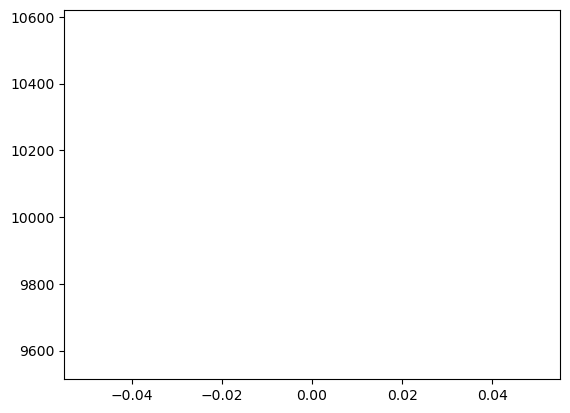

In [183]:
model.show_loss()

In [ ]:
x = np.array([[0.25],
              [-1], 
              [2.3], 
              [-0.2], 
              [1]])

y = np.array([[0],[1],[1],[0], [1]])

model = NeuralNetwork(x, y, learning_rate = 0.1, dropout_rate = 0, batch_size = 1, epochs = 100)
model.addLayer(5, 5, 'relu', 'input')
model.addLayer(5, 10, 'relu', 'hidden')
model.addLayer(10, 20, 'relu', 'hidden')
model.addLayer(20, 10, 'relu', 'hidden')
model.addLayer(10, 5, 'sigmoid', 'output')

model.train()

### e - Implement optimizer
Implement any two optimizers of your choice. Briefly present the optimizers 
in the report. The optimizers can be flavours of gradient descent. For 
instance: Stochastic gradient descent (SGD) and SGD with momentum. 
SGD and mini-batch gradient descent, etc. 

### f - Evaluate different neural network architectures/parameters, present and discuss your results.
Be creative in the analysis and discussion. Evaluate different
hyperparameters. For instance: different network architectures, activation 
functions, comparison of optimizers, L1/L2 performance comparison with 
dropout, etc. Support your results with plots/graph and discussion.